# Paths

In [1]:
import pandas as pd
from tvi_footballindex.parsing import f24_parser
from tvi_footballindex.tvi import calculator

In [2]:
f24_file_path = "data/F24 - CSVs/PRT-PrimeiraLiga_24-25_events.csv"

# Processing

In [3]:
# 1. Parse F24 data
match_events = f24_parser.parsef24_csv(f24_file_path)
match_events.head()

Processing: data/F24 - CSVs/PRT-PrimeiraLiga_24-25_events.csv


game_id     period  minute  second  expanded_minute event_name  \
0  1836567  FirstHalf       0     0.0                0      Start   
1  1836567  FirstHalf       0     0.0                0      Start   
2  1836567  FirstHalf       0     0.0                0       Pass   
3  1836567  FirstHalf       0     3.0                0       Pass   
4  1836567  FirstHalf       0     5.0                0       Pass   

   outcome_type  team_id      team  player_id          player     x     y  \
0    Successful      296  Sporting        NaN             NaN   0.0   0.0   
1    Successful      121   Rio Ave        NaN             NaN   0.0   0.0   
2    Successful      121   Rio Ave   436559.0         Clayton  49.9  50.5   
3  Unsuccessful      121   Rio Ave   149468.0  Amine Oudrhiri  44.3  51.8   
4  Unsuccessful      296  Sporting   509068.0  Geovany Quenda  30.9   4.6   

   end_x  end_y  goal_mouth_y  goal_mouth_z  blocked_x  blocked_y  \
0    NaN    NaN           NaN           NaN        NaN        NaN   
1    NaN    NaN           NaN           NaN        NaN        NaN   
2   39.3   46.4           NaN           NaN        NaN        NaN   
3   67.8   89.4           NaN           NaN        NaN        NaN   
4   45.7    0.0           NaN           NaN        NaN        NaN   

                                          qualifiers  is_touch is_shot  \
0                                                 []     False     NaN   
1                                                 []     False     NaN   
2  [{'type': {'displayName': 'Length', 'value': 2...      True     NaN   
3  [{'type': {'displayName': 'Angle', 'value': 21...      True     NaN   
4  [{'type': {'displayName': 'Angle', 'value': 21...      True     NaN   

  is_goal card_type  related_event_id  related_player_id  id  
0     NaN       NaN               NaN                NaN   0  
1     NaN       NaN               NaN                NaN   1  
2     NaN       NaN               NaN                NaN   2  
3     NaN       NaN               NaN                NaN   3  
4     NaN       NaN               NaN                NaN   4

In [4]:
# 2. Calculate player playtime
print("Calculating player playtime...")
play_time = f24_parser.calculate_player_playtime(match_events, min_playtime=30, from_processed=True)
play_time.head()

Calculating player playtime...


game_id  team_id player_id    position  play_time
0  1836567      296    376862  Goalkeeper       90.0
1  1836567      296    509068  Midfielder       90.0
2  1836567      296    425093  Midfielder       75.0
3  1836567      296    395992    Defender       90.0
4  1836567      296    443663    Defender       90.0

## Get Actions


Ações Defensivas
*   Interceção
*   Desarme (com sucesso)
*   Duelo aéreo ganho


Ações de Construção

*   Passe progressivo
*   Drible

Ações ofensivas
*   Passes chave
*   Deep completition (incluindo cruzamentos)
*   Remate à baliza





In [5]:
# Defensive Actions
interceptions = f24_parser.get_interceptions(match_events, from_processed=True)
tackles = f24_parser.get_tackles(match_events, from_processed=True)
aerials = f24_parser.get_aerials(match_events, from_processed=True)

# Possession Actions
progressive_passes = f24_parser.get_progressive_passes(match_events, from_processed=True)
dribbles = f24_parser.get_dribbles(match_events, from_processed=True)

# Offensive Actions
key_passes = f24_parser.get_key_passes(match_events, from_processed=True)
#deep_completions = f24_parser.get_deep_completions(match_events, from_processed=True)
shots_on_target = f24_parser.get_shots_on_target(match_events, from_processed=True)

C:\Users\ldoutors\OneDrive - Capgemini\Documents\Personal\MastersBigDataFutebol\TVI_footballindex\tvi_footballindex\parsing\f24_parser.py:858: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  progressive_passes['event_name'] = 'progressive_pass'
C:\Users\ldoutors\OneDrive - Capgemini\Documents\Personal\MastersBigDataFutebol\TVI_footballindex\tvi_footballindex\parsing\f24_parser.py:294: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exploded_df = nome_df.merge(qualifiers_df, on="id", how="outer").fillna("-")


In [6]:
# Combine all actions into a single DataFrame
all_metric_events = pd.concat([
    interceptions, tackles, aerials, progressive_passes, dribbles, key_passes, shots_on_target#, deep_completions
])
all_metric_events['player_id'] = all_metric_events['player_id'].astype(int).astype(str)
all_metric_events

game_id  team_id player_id       event_name     x     y
0     1836567      296    425093     Interception  48.1  82.4
1     1836567      121    125953     Interception  26.7  33.3
2     1836567      121    362651     Interception  20.7   5.4
3     1836567      121    149468     Interception  55.4  22.9
4     1836567      121    362651     Interception  18.3  29.7
...       ...      ...       ...              ...   ...   ...
2445  1836819      251    397849  shots_on_target  78.1  57.4
2446  1836819      263    322631  shots_on_target  88.5  50.0
2447  1836819      251    531769  shots_on_target  94.5  56.3
2448  1836809      296    344378  shots_on_target  87.6  55.5
2449  1836809      296    362815  shots_on_target  92.7  45.7

[57596 rows x 6 columns]

## Calculate Metric (TVI)

The TVI (Tactical Versatility Index) metric is calculated as follows:

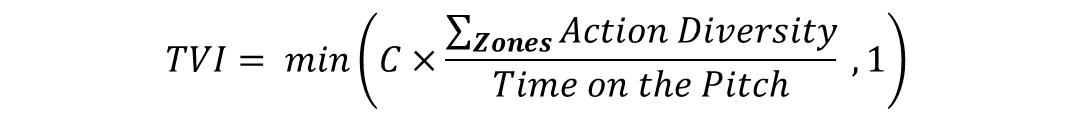

Where the action diversity is how many of the above mentioned actions the player did on that game. Only 1 action per type of action is considered.

C is the normalization constant, which in this case is 90/44 ~ 2.05, where 90 is the duration of a game, and 44 is the maximum number of possible distinct actions (pairs action, zone).

In [ ]:
# Calculate TVI with the custom grid
tvi_df, q = calculator.calculate_tvi(
    all_metric_events, 
    play_time,
    C = 90/38
)
tvi_df, q

event_name
Aerial              0.250000
Interception        0.333333
Tackle              0.333333
dribble             0.333333
key_pass            0.333333
progressive_pass    0.111111
shots_on_target     0.500000
Name: count, dtype: float64
event_name
Aerial              0.797468
Interception        1.063291
Tackle              1.063291
dribble             1.063291
key_pass            1.063291
progressive_pass    0.354430
shots_on_target     1.594937
Name: count, dtype: float64
['Aerial_1_clipped', 'Aerial_2_clipped', 'Aerial_3_clipped', 'Aerial_4_clipped', 'Aerial_5_clipped', 'Aerial_6_clipped', 'Interception_1_clipped', 'Interception_2_clipped', 'Interception_3_clipped', 'Interception_4_clipped', 'Interception_5_clipped', 'Interception_6_clipped', 'Tackle_1_clipped', 'Tackle_2_clipped', 'Tackle_3_clipped', 'Tackle_4_clipped', 'Tackle_5_clipped', 'Tackle_6_clipped', 'dribble_1_clipped', 'dribble_2_clipped', 'dribble_3_clipped', 'dribble_4_clipped', 'dribble_5_clipped', 'dribble_6_cli

(      game_id  team_id player_id  Aerial_1  Aerial_2  Aerial_3  Aerial_4  \
 0     1836567      296    376862       0.0       0.0       0.0       0.0   
 1     1836567      296    509068       0.0       0.0       0.0       0.0   
 2     1836567      296    425093       0.0       0.0       0.0       0.0   
 3     1836567      296    395992       0.0       0.0       0.0       1.0   
 4     1836567      296    443663       1.0       0.0       0.0       0.0   
 ...       ...      ...       ...       ...       ...       ...       ...   
 7232  1836817      936    416887       0.0       1.0       0.0       0.0   
 7233  1836817      936    409025       0.0       0.0       0.0       0.0   
 7234  1836817      297    478494       0.0       0.0       0.0       0.0   
 7235  1836809      296    259929       0.0       1.0       0.0       1.0   
 7236  1836809      107    384889       0.0       0.0       0.0       0.0   
 
       Aerial_5  Aerial_6  Interception_1  Interception_2  Interception_3 

In [10]:
# Aggregate TVI by player
aggregated_tvi = calculator.aggregate_tvi_by_player(tvi_df)
aggregated_tvi

C:\Users\ldoutors\OneDrive - Capgemini\Documents\Personal\MastersBigDataFutebol\TVI_footballindex\tvi_footballindex\tvi\calculator.py:262: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tvi_aggregated = (tvi_final.drop(columns=cols_to_drop)


player_id  Aerial_1  Aerial_2  Aerial_3  Aerial_4  Aerial_5  Aerial_6  \
321    437687  0.000000       0.0  0.000000  0.000000  0.000000       0.0   
270    421890  0.000000       0.0  2.000000  0.000000  2.000000       0.0   
294    425094  0.000000       0.0  0.000000  0.000000  0.000000       0.0   
20     123872  0.000000       0.0  0.000000  0.000000  0.000000       0.0   
405    488322  0.293194       0.0  0.235602  0.528796  0.235602       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
164    376862  0.000000       0.0  0.000000  0.000000  0.000000       0.0   
83     322683  0.000000       0.0  0.000000  0.000000  0.000000       0.0   
232    404768  0.000000       0.0  0.000000  0.000000  0.000000       0.0   
208    397569  0.000000       0.0  0.000000  0.000000  0.000000       0.0   
412    494902  0.000000       0.0  0.000000  0.000000  0.000000       0.0   

     Interception_1  Interception_2  Interception_3  Interception_4  \
321        0.000000        0.000000             0.0        0.000000   
270        0.000000        0.000000             0.0        0.000000   
294        0.000000        0.000000             0.0        1.000000   
20         0.000000        0.500000             0.0        0.000000   
405        0.235602        0.471204             0.0        0.235602   
..              ...             ...             ...             ...   
164        0.000000        0.000000             0.0        0.000000   
83         0.000000        0.000000             0.0        0.000000   
232        0.000000        0.000000             0.0        0.000000   
208        0.000000        0.000000             0.0        0.000000   
412        0.000000        0.000000             0.0        0.000000   

     Interception_5  Interception_6  Tackle_1  Tackle_2  Tackle_3  Tackle_4  \
321             0.0             0.0       0.0  0.000000       0.0  1.000000   
270             0.0             0.0       0.0  1.000000       0.0  0.000000   
294             0.0             0.0       0.0  0.000000       0.0  1.000000   
20              0.0             0.0       0.0  0.500000       0.0  0.000000   
405             0.0             0.0       0.0  0.706806       0.0  0.471204   
..              ...             ...       ...       ...       ...       ...   
164             0.0             0.0       0.0  0.000000       0.0  0.000000   
83              0.0             0.0       0.0  0.000000       0.0  0.000000   
232             0.0             0.0       0.0  0.000000       0.0  0.000000   
208             0.0             0.0       0.0  0.000000       0.0  0.000000   
412             0.0             0.0       0.0  0.000000       0.0  0.000000   

     Tackle_5  Tackle_6  dribble_1  dribble_2  dribble_3  dribble_4  \
321  0.000000       0.0        0.0        0.0        0.0   1.000000   
270  0.000000       1.0        0.0        0.0        0.0   0.000000   
294  0.000000       1.0        0.0        0.0        0.0   0.000000   
20   0.000000       0.0        0.0        0.0        0.0   0.000000   
405  0.293194       0.0        0.0        0.0        0.0   0.586387   
..        ...       ...        ...        ...        ...        ...   
164  0.000000       0.0        0.0        0.0        0.0   0.000000   
83   0.000000       0.0        0.0        0.0        0.0   0.000000   
232  0.000000       0.0        0.0        0.0        0.0   0.000000   
208  0.000000       0.0        0.0        0.0        0.0   0.000000   
412  0.000000       0.0        0.0        0.0        0.0   0.000000   

     dribble_5  dribble_6  key_pass_1  key_pass_2  key_pass_3  key_pass_4  \
321        1.0        1.0         0.0         0.0    0.000000         0.0   
270        0.0        0.0         0.0         0.0    0.000000         0.0   
294        0.0        0.0         0.0         0.0    0.000000         0.0   
20         0.0        0.0         0.0         0.0    0.000000         0.5   
405        0.0        0.0         0.0  

In [11]:
# 5. Add player names and filter
print("Adding player names and filtering...")
player_names = (
    match_events[["player_id", "player", "team_id", "team"]].drop_duplicates().dropna()
)
player_names.rename(
    columns={"player": "player_name", "team": "team_name"}, inplace=True
)
aggregated_tvi['player_id'] = aggregated_tvi['player_id'].astype(int)
tvi_final = pd.merge(player_names, aggregated_tvi, on='player_id', how='right')
tvi_final.head(20)

Adding player names and filtering...


player_id       player_name  team_id             team_name  Aerial_1  \
0    437687.0     Tiago Gouveia      299               Benfica  0.000000   
1    421890.0    Bernardo Vital     2188               Estoril  0.000000   
2    425094.0      Tiago Mamede    28635    Estrela da Amadora  0.000000   
3    123872.0       André Sousa      936              Nacional  0.000000   
4    488322.0     Chiheb Labidi      936              Nacional  0.293194   
5    376916.0            Morato      299               Benfica  0.000000   
6    472910.0        Manu Silva      107  Vitoria de Guimaraes  0.275103   
7    472910.0        Manu Silva      299               Benfica  0.275103   
8    330958.0      Daniel Penha      936              Nacional  0.000000   
9    424624.0      Zeki Amdouni      299               Benfica  0.000000   
10   538807.0     Conrad Harder      296              Sporting  0.238710   
11   486855.0  Maxime Dominguez      290           Gil Vicente  0.000000   
12   418749.0      Paulo Victor      263               Farense  0.479180   
13   353193.0  Jan-Niklas Beste      299               Benfica  0.000000   
14   322689.0       André Horta      288                 Braga  0.000000   
15   549606.0   Diego Rodrigues      288                 Braga  0.000000   
16   344378.0              Pote      296              Sporting  0.000000   
17   401251.0   Rodrigo Zalazar      288                 Braga  0.133968   
18   422007.0   Roger Fernandes      288                 Braga  0.056426   
19   546810.0    Valentim Sousa      121               Rio Ave  0.000000   

    Aerial_2  Aerial_3  Aerial_4  Aerial_5  Aerial_6  Interception_1  \
0   0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
1   0.000000  2.000000  0.000000  2.000000  0.000000        0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
4   0.000000  0.235602  0.528796  0.235602  0.000000        0.235602   
5   0.000000  1.000000  1.000000  2.000000  0.000000        1.000000   
6   0.123796  0.330124  0.795048  0.718019  0.123796        0.000000   
7   0.123796  0.330124  0.795048  0.718019  0.123796        0.000000   
8   0.051561  0.176471  0.398693  0.153232  0.142338        0.159768   
9   0.124224  0.000000  0.453416  0.336957  0.000000        0.000000   
10  0.000000  0.327419  0.364516  0.840323  0.253226        0.000000   
11  0.000000  0.343220  0.000000  0.000000  0.000000        0.000000   
12  0.360026  0.057655  0.384369  0.057655  0.168482        0.028828   
13  0.000000  0.000000  0.239362  0.000000  0.000000        0.000000   
14  0.000000  0.126667  0.164444  0.000000  0.000000        0.000000   
15  0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
16  0.106227  0.085470  0.000000  0.000000  0.000000        0.106227   
17  0.117862  0.342606  1.006589  0.190337  0.363836        0.000000   
18  0.000000  0.000000  0.492790  0.092163  0.056426        0.056426   
19  0.000000  0.000000  0.000000  0.000000  0.000000        1.000000   

    Interception_2  Interception_3  Interception_4  Interception_5  \
0         0.000000        0.000000        0.000000        0.000000   
1         0.000000        0.000000        0.000000        0.000000   
2         0.000000        0.000000        1.000000        0.000000   
3         0.500000        0.000000        0.000000        0.000000   
4         0.471204        0.000000        0.235602        0.000000   
5         0.000000        0.000000        2.000000        0.000000   
6         0.339752        0.000000        1.045392        0.000000   
7         0.339752        0.000000        1.045392        0.000000   
8         0.153958        0.000000        0.074074        0.050109   
9         0.000000        0.105590        0.108696        0.000000   
10        0.000000        0.000000        0.000000        0.000000   
11        0.343220        0.000000        0.343220    

# Results deep dive

In [12]:
# filter out players with small playing time
time_threshold = 450 # minutes -> 5 full matches
tvi_final_wNames_filtered = tvi_final[tvi_final['play_time'] > time_threshold]\
  .sort_values('TVI', ascending=False).reset_index(drop=True)
tvi_final_wNames_filtered.head(20)

player_id       player_name  team_id             team_name  Aerial_1  \
0    472910.0        Manu Silva      299               Benfica  0.275103   
1    472910.0        Manu Silva      107  Vitoria de Guimaraes  0.275103   
2    330958.0      Daniel Penha      936              Nacional  0.000000   
3    424624.0      Zeki Amdouni      299               Benfica  0.000000   
4    538807.0     Conrad Harder      296              Sporting  0.238710   
5    418749.0      Paulo Victor      263               Farense  0.479180   
6    344378.0              Pote      296              Sporting  0.000000   
7    401251.0   Rodrigo Zalazar      288                 Braga  0.133968   
8    422007.0   Roger Fernandes      288                 Braga  0.056426   
9    447270.0  Brandon Aguilera      121               Rio Ave  0.133543   
10   408941.0  Jordan Holsgrove     2188               Estoril  0.076401   
11   125452.0         Alan Ruiz    28635    Estrela da Amadora  0.050114   
12   362651.0    Marios Vrousai      121               Rio Ave  0.251096   
13   447233.0     Alberto Costa      107  Vitoria de Guimaraes  0.285714   
14   425879.0        Ege Tiknaz      121               Rio Ave  0.317427   
15   444250.0    Gabri Martínez      288                 Braga  0.098397   
16   388823.0            Madson      108            Moreirense  0.000000   
17   404981.0      Leonel Bucca    28635    Estrela da Amadora  0.054386   
18   413187.0     Ismaël Gharbi      288                 Braga  0.000000   
19   409279.0   Hidemasa Morita      296              Sporting  0.197745   

    Aerial_2  Aerial_3  Aerial_4  Aerial_5  Aerial_6  Interception_1  \
0   0.123796  0.330124  0.795048  0.718019  0.123796        0.000000   
1   0.123796  0.330124  0.795048  0.718019  0.123796        0.000000   
2   0.051561  0.176471  0.398693  0.153232  0.142338        0.159768   
3   0.124224  0.000000  0.453416  0.336957  0.000000        0.000000   
4   0.000000  0.327419  0.364516  0.840323  0.253226        0.000000   
5   0.360026  0.057655  0.384369  0.057655  0.168482        0.028828   
6   0.106227  0.085470  0.000000  0.000000  0.000000        0.106227   
7   0.117862  0.342606  1.006589  0.190337  0.363836        0.000000   
8   0.000000  0.000000  0.492790  0.092163  0.056426        0.056426   
9   0.000000  0.302435  0.208955  0.070699  0.000000        0.070699   
10  0.114601  0.336163  0.300934  0.033531  0.038200        0.191002   
11  0.082764  0.399393  1.665907  0.068337  0.498861        0.000000   
12  0.322838  0.000000  0.463133  0.107613  0.071742        0.071742   
13  0.285714  0.142857  0.285714  0.000000  0.285714        0.000000   
14  0.083506  0.083506  0.381224  0.083506  0.046680        0.366183   
15  0.065598  0.000000  0.128280  0.048834  0.065598        0.000000   
16  0.127240  0.074373  0.473118  0.051075  0.057348        0.000000   
17  0.216667  0.284211  0.586842  0.330702  0.232456        0.078947   
18  0.000000  0.000000  0.064687  0.000000  0.000000        0.000000   
19  0.234172  0.156114  0.410234  0.143972  0.000000        0.078057   

    Interception_2  Interception_3  Interception_4  Interception_5  \
0         0.339752        0.000000        1.045392        0.000000   
1         0.339752        0.000000        1.045392        0.000000   
2         0.153958        0.000000        0.074074        0.050109   
3         0.000000        0.105590        0.108696        0.000000   
4         0.000000        0.000000        0.000000        0.000000   
5         0.837284        0.115311        0.393338        0.000000   
6         0.000000        0.000000        0.186813        0.106227   
7         0.059297        0.163982        0.054905        0.000000   
8         0.356740        0.056426        0.265204        0.000000   
9         0.238806        0.000000        0.306363        0.000000   
10        0.305603        0.229202        0.458404        0.038200   
11        0.056188        0.000000        0.000000    

In [14]:
tvi_final_wNames_filtered[['player_name', 'team_name', 'position', 'action_diversity', 'play_time', 'TVI', 'TVI_entropy']].head(20)

player_name             team_name    position  action_diversity  \
0                 Pote              Sporting     Forward          8.869353   
1           Manu Silva  Vitoria de Guimaraes  Midfielder          8.954608   
2           Manu Silva               Benfica  Midfielder          8.954608   
3     Jordan Holsgrove               Estoril  Midfielder          9.789898   
4         Daniel Penha              Nacional  Midfielder          7.500363   
5            Alan Ruiz    Estrela da Amadora     Forward          7.682612   
6          Tiago Silva  Vitoria de Guimaraes  Midfielder          8.908972   
7         Paulo Victor               Farense    Defender          8.539398   
8       Ángel Di María               Benfica     Forward          7.969221   
9      Rodrigo Zalazar                 Braga  Midfielder          8.441435   
10        Zeki Amdouni               Benfica     Forward          7.481366   
11         David Simão                Arouca  Midfielder          8.092413   
12    Brandon Aguilera               Rio Ave  Midfielder          8.017282   
13          Rony Lopes               Farense  Midfielder          8.201949   
14     Hidemasa Morita              Sporting  Midfielder          7.409367   
15  Maximiliano Araújo              Sporting  Midfielder          7.677612   
16        Nuno Moreira           Casa Pia AC     Forward          7.650136   
17       Alberto Costa  Vitoria de Guimaraes    Defender          8.714286   
18    Gustavo Klismahn           Santa Clara  Midfielder          6.361761   
19       Ismaël Gharbi                 Braga  Midfielder          6.261930   

    play_time       TVI  TVI_entropy  
0       819.0  0.232268     0.036808  
1       727.0  0.227898     0.035578  
2       727.0  0.227898     0.035578  
3      2356.0  0.226597     0.034041  
4      1377.0  0.224302     0.039290  
5      1317.0  0.222096     0.038917  
6      2285.0  0.222001     0.033572  
7      1561.0  0.214897     0.034852  
8      1592.0  0.214567     0.035264  
9      1366.0  0.214129     0.035257  
10      644.0  0.212804     0.036010  
11     1753.0  0.212363     0.035933  
12     1273.0  0.208884     0.034646  
13     1129.0  0.201103     0.033752  
14     1153.0  0.200465     0.036412  
15     1675.0  0.199050     0.035110  
16     1472.0  0.198709     0.034779  
17      630.0  0.198052     0.032086  
18      727.0  0.196949     0.036909  
19      943.0  0.195218     0.038151

In [15]:
tvi_final_wNames_filtered[['player_name', 'team_name', 'position', 'action_diversity', 'play_time', 'TVI', 'TVI_entropy']].sort_values('TVI_entropy', ascending=False).head(20)

player_name             team_name    position  action_diversity  \
4        Daniel Penha              Nacional  Midfielder          7.500363   
5           Alan Ruiz    Estrela da Amadora     Forward          7.682612   
19      Ismaël Gharbi                 Braga  Midfielder          6.261930   
32       Leonel Bucca    Estrela da Amadora     Forward          6.158772   
23        João Novais               Rio Ave  Midfielder          6.351243   
28         Igor Jesus    Estrela da Amadora  Midfielder          6.490716   
18   Gustavo Klismahn           Santa Clara  Midfielder          6.361761   
0                Pote              Sporting     Forward          8.869353   
22        Bruno Costa              Nacional  Midfielder          6.594022   
14    Hidemasa Morita              Sporting  Midfielder          7.409367   
45  Mathias De Amorim             Famalicao  Midfielder          5.627517   
58             Madson            Moreirense  Midfielder          5.809140   
10       Zeki Amdouni               Benfica     Forward          7.481366   
11        David Simão                Arouca  Midfielder          8.092413   
78     Tunde Akinsola       AVS Futebol SAD  Midfielder          5.173679   
1          Manu Silva  Vitoria de Guimaraes  Midfielder          8.954608   
2          Manu Silva               Benfica  Midfielder          8.954608   
81      Fábio Ronaldo               Rio Ave  Midfielder          5.427673   
82      Fábio Ronaldo    Estrela da Amadora  Midfielder          5.427673   
8      Ángel Di María               Benfica     Forward          7.969221   

    play_time       TVI  TVI_entropy  
4      1377.0  0.224302     0.039290  
5      1317.0  0.222096     0.038917  
19      943.0  0.195218     0.038151  
32     1140.0  0.188397     0.037535  
23     1247.0  0.193555     0.037321  
28      754.0  0.189896     0.036913  
18      727.0  0.196949     0.036909  
0       819.0  0.232268     0.036808  
22      803.0  0.193592     0.036550  
14     1153.0  0.200465     0.036412  
45      894.0  0.183038     0.036305  
58     1116.0  0.177786     0.036141  
10      644.0  0.212804     0.036010  
11     1753.0  0.212363     0.035933  
78      927.0  0.172109     0.035667  
1       727.0  0.227898     0.035578  
2       727.0  0.227898     0.035578  
81      954.0  0.171527     0.035440  
82      954.0  0.171527     0.035440  
8      1592.0  0.214567     0.035264

In [ ]:
tvi_final_wNames_filtered[['player_name', 'team_name', 'position', 'action_diversity', 'play_time', 'TVI']].sort_values('action_diversity', ascending=False).head(20)

player_name          team_name    position  action_diversity  \
0       Gabriel Pires            Benfica  Midfielder         10.560948   
4              Otávio           FC Porto  Midfielder          9.579131   
12         Ryan Gauld         SC Farense  Midfielder          9.215508   
7     Sérgio Oliveira           FC Porto  Midfielder          8.997297   
1        Adel Taarabt            Benfica  Midfielder          8.956037   
16      Jonatan Lucca         SC Farense  Midfielder          8.779510   
10           Pedrinho        Gil Vicente  Midfielder          8.708840   
29         Rúben Lima         Belenenses    Defender          8.639016   
17            Willyan       Portimonense    Defender          8.634761   
2   Carlos Valenzuela       FC Famalicão  Midfielder          8.599436   
22            Kalindi        CD Nacional    Defender          8.555556   
8            Gilberto            Benfica    Defender          8.542069   
24       Jesús Corona           FC Porto  Midfielder          8.503813   
35           Paulinho           Boavista  Midfielder          8.334877   
45   Nahuel Ferraresi         Moreirense    Defender          8.280564   
3       Iuri Medeiros     Sporting Braga  Midfielder          8.224176   
25    Lucas Fernandes       Portimonense  Midfielder          8.218750   
18         Fali Candé       Portimonense     Forward          8.218110   
51   Maurício Antônio       Portimonense    Defender          8.179199   
49       Falaye Sacko  Vitória Guimarães    Defender          8.168213   

    play_time       TVI  
0       886.0  0.313975  
4      2003.0  0.232833  
12     2863.0  0.213619  
7      2220.0  0.220209  
1      1524.0  0.241589  
16     1796.0  0.209557  
10     1233.0  0.214001  
29     2845.0  0.198434  
17     2382.0  0.209526  
2       709.0  0.239454  
22     1215.0  0.203704  
8      1450.0  0.220063  
24     2098.0  0.202791  
35     2592.0  0.196496  
45     1914.0  0.191294  
3       910.0  0.236014  
25      576.0  0.202415  
18     1270.0  0.209377  
51     2846.0  0.186865  
49     2479.0  0.187301

# Analysis

In [3]:
import glob
import os
import pandas as pd

# read output files and concatenate
output_dir = "data/output/withoutDeepCompletion/"

# read all csv files in the output directory
files = glob.glob(os.path.join(output_dir, "*"))
output_dfs = []
for file in files:
    df = pd.read_csv(file)
    output_dfs.append(df)
# concatenate all dataframes
output_df = pd.concat(output_dfs, ignore_index=True)

#filter out players with small playing time
time_threshold = 450  # minutes -> 5 full matches
output_df = output_df[output_df['play_time'] > time_threshold]\
    .sort_values('TVI', ascending=False).reset_index(drop=True)

# filter out goalkeepers
output_df = output_df[output_df['position'] != 'Goalkeeper'].reset_index(drop=True)

output_df

player_id            player_name  team_id             team_name  \
0      244560.0      Aleksandr Golovin      248                Monaco   
1      418589.0         Patrick Wimmer       33             Wolfsburg   
2      430985.0           Abdul Fatawu       14             Leicester   
3      472910.0             Manu Silva      107  Vitoria de Guimaraes   
4      472910.0             Manu Silva      299               Benfica   
...         ...                    ...      ...                   ...   
2143   369398.0           Fran Navarro      297                 Porto   
2144   369398.0           Fran Navarro      288                 Braga   
2145   506115.0                  Chuki       58       Real Valladolid   
2146   372828.0              Abel Ruiz     2783                Girona   
2147   134332.0  Bobby De Cordova-Reid       14             Leicester   

      Aerial_1  Aerial_2  Aerial_3  Aerial_4  Aerial_5  Aerial_6  ...  \
0     0.142991  0.000000  0.000000  0.252336  0.210280  0.069159  ...   
1     0.091825  0.094787  0.359597  0.519550  0.174171  0.149289  ...   
2     0.491803  0.327869  0.327869  0.327869  0.000000  0.408015  ...   
3     0.275103  0.123796  0.330124  0.795048  0.718019  0.123796  ...   
4     0.275103  0.123796  0.330124  0.795048  0.718019  0.123796  ...   
...        ...       ...       ...       ...       ...       ...  ...   
2143  0.000000  0.000000  0.103641  0.322129  0.000000  0.161064  ...   
2144  0.000000  0.000000  0.103641  0.322129  0.000000  0.161064  ...   
2145  0.090764  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2146  0.109315  0.000000  0.053888  0.102386  0.193226  0.000000  ...   
2147  0.164319  0.000000  0.000000  0.131455  0.000000  0.117371  ...   

      shots_on_target_3  shots_on_target_4  shots_on_target_5  \
0              0.000000                0.0           0.480374   
1              0.000000                0.0           0.397512   
2              0.327869                0.0           0.058288   
3              0.000000                0.0           0.228336   
4              0.000000                0.0           0.228336   
...                 ...                ...                ...   
2143           0.000000                0.0           0.843137   
2144           0.000000                0.0           0.843137   
2145           0.000000                0.0           0.547771   
2146           0.000000                0.0           0.445727   
2147           0.000000                0.0           0.228482   

      shots_on_target_6  action_diversity  shannon_entropy  TVI_entropy  \
0              0.153271          9.224299         2.989556     0.036037   
1              0.053318          7.850711         2.795089     0.039361   
2              0.285974          8.867031         2.925593     0.036825   
3              0.000000          8.726272         2.753640     0.035194   
4              0.000000          8.726272         2.753640     0.035194   
...                 ...               ...              ...          ...   
2143           0.000000          2.348739         1.069991     0.014597   
2144           0.000000          2.348739         1.069991     0.014597   
2145           0.143312          2.089172         0.937687     0.013992   
2146           0.044650          2.175520         0.945662     0.013086   
2147           0.000000          1.920188         0.897347     0.013568   

           TVI    position  play_time  
0     0.261190  Midfielder     1070.0  
1     0.260975  Midfielder     1688.0  
2     0.258844  Midfielder      549.0  
3     0.257366  Midfielder      727.0  
4     0.257366  Midfielder      727.0  
...        ...         ...        ...  
2143  0.076294     Forward      714.0  
2144  0.076294     Forward      714.0  
2145  0.075427  Midfielder      628.0  
2146  0.074754     Forward     1299.0  
2147  0.070423  Midfielder      639.0  

[2148 rows x 52 columns]

## Action Distribution

In [4]:
output_df.columns

Index(['player_id', 'player_name', 'team_id', 'team_name', 'Aerial_1',
       'Aerial_2', 'Aerial_3', 'Aerial_4', 'Aerial_5', 'Aerial_6',
       'Interception_1', 'Interception_2', 'Interception_3', 'Interception_4',
       'Interception_5', 'Interception_6', 'Tackle_1', 'Tackle_2', 'Tackle_3',
       'Tackle_4', 'Tackle_5', 'Tackle_6', 'dribble_1', 'dribble_2',
       'dribble_3', 'dribble_4', 'dribble_5', 'dribble_6', 'key_pass_1',
       'key_pass_2', 'key_pass_3', 'key_pass_4', 'key_pass_5', 'key_pass_6',
       'progressive_pass_1', 'progressive_pass_2', 'progressive_pass_3',
       'progressive_pass_4', 'progressive_pass_5', 'progressive_pass_6',
       'shots_on_target_1', 'shots_on_target_2', 'shots_on_target_3',
       'shots_on_target_4', 'shots_on_target_5', 'shots_on_target_6',
       'action_diversity', 'shannon_entropy', 'TVI_entropy', 'TVI', 'position',
       'play_time'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def analyze_action_frequencies(df):
    """
    Analyze raw action frequencies across all zones and players
    Each player contributes 6 data points (one per zone) for each action type
    
    Args:
        df: DataFrame with the specified column structure
    """
    
    # Define action types and their columns
    action_types = {
        'Aerial': [f'Aerial_{i}' for i in range(1, 7)],
        'Interception': [f'Interception_{i}' for i in range(1, 7)],
        'Tackle': [f'Tackle_{i}' for i in range(1, 7)],
        'Dribble': [f'dribble_{i}' for i in range(1, 7)],
        'Key Pass': [f'key_pass_{i}' for i in range(1, 7)],
        'Progressive Pass': [f'progressive_pass_{i}' for i in range(1, 7)],
        'Shots on Target': [f'shots_on_target_{i}' for i in range(1, 7)]
    }
    
    # Create long-format data: each row = one player-zone-action observation
    long_data = []
    for _, player_row in df.iterrows():
        for action_name, cols in action_types.items():
            for zone_idx, col in enumerate(cols, 1):
                long_data.append({
                    'player_id': player_row['player_id'],
                    'player_name': player_row['player_name'],
                    'team_name': player_row.get('team_name', ''),
                    'position': player_row.get('position', ''),
                    'action_type': action_name,
                    'zone': zone_idx,
                    'action_count': player_row[col]
                })
    
    long_df = pd.DataFrame(long_data)
    
    # Set up plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(20, 24))
    
    # 1. Overall distribution comparison (violin plots)
    plt.subplot(4, 2, 1)
    sns.violinplot(data=long_df, x='action_type', y='action_count', alpha=0.8)
    plt.title('Raw Action Count Distributions\n(Each player contributes 6 points per action)', 
              fontsize=14, fontweight='bold')
    plt.ylabel('Action Count per Zone')
    plt.xticks(rotation=45, ha='right')
    
    # 2. Box plots for detailed comparison
    plt.subplot(4, 2, 2)
    sns.boxplot(data=long_df, x='action_type', y='action_count')
    plt.title('Action Count Distributions (Box Plots)\nShowing Quartiles and Outliers', 
              fontsize=14, fontweight='bold')
    plt.ylabel('Action Count per Zone')
    plt.xticks(rotation=45, ha='right')
    
    # 3. Frequency of non-zero actions
    plt.subplot(4, 2, 3)
    nonzero_props = []
    action_names = []
    for action in action_types.keys():
        action_data = long_df[long_df['action_type'] == action]['action_count']
        nonzero_prop = (action_data > 0).mean() * 100
        nonzero_props.append(nonzero_prop)
        action_names.append(action)
    
    bars = plt.bar(action_names, nonzero_props, alpha=0.8, color='lightcoral')
    plt.title('Percentage of Zones with Non-Zero Actions', fontsize=14, fontweight='bold')
    plt.ylabel('% of Zones with Actions > 0')
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels
    for bar, prop in zip(bars, nonzero_props):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{prop:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # 4. Distribution by zones
    plt.subplot(4, 2, 4)
    sns.boxplot(data=long_df, x='zone', y='action_count', hue='action_type')
    plt.title('Action Distributions by Zone', fontsize=14, fontweight='bold')
    plt.ylabel('Action Count')
    plt.xlabel('Zone')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 5. Heatmap: Average actions by zone and type
    plt.subplot(4, 2, 5)
    pivot_data = long_df.groupby(['action_type', 'zone'])['action_count'].mean().unstack()
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', 
                cbar_kws={'label': 'Average Action Count'})
    plt.title('Average Action Count by Zone and Type', fontsize=14, fontweight='bold')
    plt.ylabel('Action Type')
    plt.xlabel('Zone')
    
    # 6. Statistical summary table
    plt.subplot(4, 2, 6)
    plt.axis('off')
    
    summary_stats = []
    for action in action_types.keys():
        action_data = long_df[long_df['action_type'] == action]['action_count']
        stats_dict = {
            'Action': action,
            'Mean': action_data.mean(),
            'Median': action_data.median(),
            'Std': action_data.std(),
            'Max': action_data.max(),
            'Min': action_data.min(),
            '% Non-zero': (action_data > 0).mean() * 100,
            'Q75': action_data.quantile(0.75),
            'Q95': action_data.quantile(0.95)
        }
        summary_stats.append(stats_dict)
    
    summary_df = pd.DataFrame(summary_stats)
    
    # Create table
    table_data = summary_df.round(2).values
    col_labels = ['Action', 'Mean', 'Median', 'Std', 'Max', 'Min', '% Non-zero', 'Q75', 'Q95']
    
    table = plt.table(cellText=table_data,
                     colLabels=col_labels,
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    plt.title('Statistical Summary by Action Type\n(All player-zone observations)', 
              fontsize=14, fontweight='bold', pad=20)
    
    # 7. Action frequency histograms
    plt.subplot(4, 2, 7)
    
    # Calculate bin edges that work for all actions
    all_counts = long_df['action_count'].values
    max_count = max(all_counts)
    bins = np.arange(0, min(max_count + 2, 21))  # Cap at 20 for readability
    
    for action in action_types.keys():
        action_data = long_df[long_df['action_type'] == action]['action_count']
        plt.hist(action_data, bins=bins, alpha=0.6, label=action, density=True)
    
    plt.title('Action Count Frequency Distributions', fontsize=14, fontweight='bold')
    plt.xlabel('Action Count per Zone')
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(0, min(max_count, 20))
    
    # 8. Position-based analysis (if position data available)
    if 'position' in df.columns and not df['position'].isna().all():
        plt.subplot(4, 2, 8)
        
        # Filter to most common positions
        top_positions = long_df['position'].value_counts().head(4).index
        pos_filtered = long_df[long_df['position'].isin(top_positions)]
        
        sns.boxplot(data=pos_filtered, x='action_type', y='action_count', hue='position')
        plt.title('Action Distributions by Position\n(Top 4 positions)', 
                  fontsize=14, fontweight='bold')
        plt.ylabel('Action Count per Zone')
        plt.xticks(rotation=45, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    return long_df, summary_df

def analyze_tvi_correlations(df):
    """
    Analyze correlations between action types and TVI value
    Uses both raw action counts and binary presence (clipped to 1)
    """
    
    action_types = {
        'Aerial': [f'Aerial_{i}' for i in range(1, 7)],
        'Interception': [f'Interception_{i}' for i in range(1, 7)],
        'Tackle': [f'Tackle_{i}' for i in range(1, 7)],
        'Dribble': [f'dribble_{i}' for i in range(1, 7)],
        'Key Pass': [f'key_pass_{i}' for i in range(1, 7)],
        'Progressive Pass': [f'progressive_pass_{i}' for i in range(1, 7)],
        'Shots on Target': [f'shots_on_target_{i}' for i in range(1, 7)]
    }
    
    if 'TVI' not in df.columns:
        print("TVI column not found in dataframe")
        return None
    
    # Create features for correlation analysis
    correlation_data = {'TVI': df['TVI'].values}
    
    # Add raw action totals
    for action_name, cols in action_types.items():
        correlation_data[f'{action_name}_total_raw'] = df[cols].sum(axis=1).values
    
    # Add binary action totals (clipped to 1, like TVI calculation)
    for action_name, cols in action_types.items():
        binary_actions = df[cols].clip(upper=1).sum(axis=1)
        correlation_data[f'{action_name}_total_binary'] = binary_actions.values
    
    # Add individual zone presence (binary)
    for action_name, cols in action_types.items():
        for zone_idx, col in enumerate(cols, 1):
            binary_presence = (df[col] > 0).astype(int)
            correlation_data[f'{action_name}_zone_{zone_idx}'] = binary_presence.values
    
    corr_df = pd.DataFrame(correlation_data)
    
    # Calculate correlations with TVI
    tvi_correlations = corr_df.corr()['TVI'].drop('TVI').sort_values(key=abs, ascending=False)
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(20, 16))
    
    # 1. TVI correlation with raw totals
    plt.subplot(3, 3, 1)
    raw_correls = [tvi_correlations[f'{action}_total_raw'] for action in action_types.keys()]
    action_names = list(action_types.keys())
    
    colors = ['red' if x < 0 else 'blue' for x in raw_correls]
    bars = plt.bar(action_names, raw_correls, color=colors, alpha=0.7)
    plt.title('TVI Correlation with Raw Action Totals', fontweight='bold')
    plt.ylabel('Correlation with TVI')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add value labels
    for bar, corr in zip(bars, raw_correls):
        plt.text(bar.get_x() + bar.get_width()/2, 
                bar.get_height() + (0.01 if corr >= 0 else -0.03),
                f'{corr:.3f}', ha='center', va='bottom' if corr >= 0 else 'top', 
                fontweight='bold')
    
    # 2. TVI correlation with binary totals
    plt.subplot(3, 3, 2)
    binary_correls = [tvi_correlations[f'{action}_total_binary'] for action in action_types.keys()]
    
    colors = ['red' if x < 0 else 'blue' for x in binary_correls]
    bars = plt.bar(action_names, binary_correls, color=colors, alpha=0.7)
    plt.title('TVI Correlation with Binary Action Totals\n(Clipped to 1, like TVI calculation)', fontweight='bold')
    plt.ylabel('Correlation with TVI')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add value labels
    for bar, corr in zip(bars, binary_correls):
        plt.text(bar.get_x() + bar.get_width()/2, 
                bar.get_height() + (0.01 if corr >= 0 else -0.03),
                f'{corr:.3f}', ha='center', va='bottom' if corr >= 0 else 'top', 
                fontweight='bold')
    
    # 3. Heatmap of zone-level correlations
    plt.subplot(3, 3, 3)
    zone_correlations = []
    zone_labels = []
    
    for action_name in action_types.keys():
        action_zone_corrs = []
        for zone in range(1, 7):
            corr_key = f'{action_name}_zone_{zone}'
            if corr_key in tvi_correlations:
                action_zone_corrs.append(tvi_correlations[corr_key])
            else:
                action_zone_corrs.append(0)
        zone_correlations.append(action_zone_corrs)
        zone_labels.append(action_name)
    
    zone_corr_df = pd.DataFrame(zone_correlations, 
                               index=zone_labels,
                               columns=[f'Zone {i}' for i in range(1, 7)])
    
    sns.heatmap(zone_corr_df, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
                cbar_kws={'label': 'Correlation with TVI'})
    plt.title('Zone-Level TVI Correlations', fontweight='bold')
    plt.ylabel('Action Type')
    
    # 4. TVI distribution by action presence (confusion matrix style)
    plt.subplot(3, 3, 4)
    
    # Find the action with highest correlation
    best_action = max(action_types.keys(), 
                     key=lambda x: abs(tvi_correlations[f'{x}_total_binary']))
    best_action_cols = action_types[best_action]
    
    # Create binary indicator: player has this action in any zone
    has_action = (df[best_action_cols].sum(axis=1) > 0)
    
    # Create TVI quartiles for cleaner visualization
    tvi_quartiles = pd.qcut(df['TVI'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
    
    # Create confusion matrix style data
    confusion_data = pd.crosstab(has_action, tvi_quartiles, normalize='columns') * 100
    
    sns.heatmap(confusion_data, annot=True, fmt='.1f', cmap='Blues',
                cbar_kws={'label': '% within TVI quartile'})
    plt.title(f'TVI Distribution by {best_action} Presence\n(Best correlated action)', 
              fontweight='bold')
    plt.ylabel(f'Has {best_action} Action')
    plt.xlabel('TVI Quartiles')
    
    # 5. Scatter plot: TVI vs best correlated action
    plt.subplot(3, 3, 5)
    best_action_total = df[best_action_cols].clip(upper=1).sum(axis=1)
    
    plt.scatter(best_action_total, df['TVI'], alpha=0.6, s=30)
    plt.xlabel(f'{best_action} Total (Binary)')
    plt.ylabel('TVI')
    plt.title(f'TVI vs {best_action} Actions\n(r = {tvi_correlations[f"{best_action}_total_binary"]:.3f})', 
              fontweight='bold')
    
    # Add correlation line
    z = np.polyfit(best_action_total, df['TVI'], 1)
    p = np.poly1d(z)
    plt.plot(best_action_total, p(best_action_total), "r--", alpha=0.8)
    
    # 6. Action diversity vs individual actions
    plt.subplot(3, 3, 6)
    
    # Calculate how many different action types each player has
    action_diversity_count = []
    for _, row in df.iterrows():
        diverse_actions = 0
        for action_name, cols in action_types.items():
            if row[cols].sum() > 0:  # Player has this action type
                diverse_actions += 1
        action_diversity_count.append(diverse_actions)
    
    plt.scatter(action_diversity_count, df['TVI'], alpha=0.6, s=30, color='green')
    plt.xlabel('Number of Different Action Types')
    plt.ylabel('TVI')
    plt.title('TVI vs Action Type Diversity', fontweight='bold')
    
    # Add correlation
    diversity_corr = np.corrcoef(action_diversity_count, df['TVI'])[0, 1]
    plt.text(0.05, 0.95, f'r = {diversity_corr:.3f}', transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round", facecolor='white', alpha=0.8), fontweight='bold')
    
    # 7. Top correlations table
    plt.subplot(3, 3, 7)
    plt.axis('off')
    
    # Get top positive and negative correlations
    top_positive = tvi_correlations.head(8)
    top_negative = tvi_correlations.tail(5)
    
    table_data = []
    table_data.append(['TOP POSITIVE CORRELATIONS', '', ''])
    for feature, corr in top_positive.items():
        clean_name = feature.replace('_total_raw', '').replace('_total_binary', '').replace('_zone_', ' Z')
        table_data.append([clean_name[:20], f'{corr:.3f}', ''])
    
    table_data.append(['', '', ''])
    table_data.append(['TOP NEGATIVE CORRELATIONS', '', ''])
    for feature, corr in top_negative.items():
        clean_name = feature.replace('_total_raw', '').replace('_total_binary', '').replace('_zone_', ' Z')
        table_data.append([clean_name[:20], f'{corr:.3f}', ''])
    
    table = plt.table(cellText=table_data,
                     colLabels=['Feature', 'Correlation', ''],
                     cellLoc='left',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.2)
    
    plt.title('Strongest TVI Correlations', fontsize=14, fontweight='bold', pad=20)
    
    # 8. Action presence heatmap
    plt.subplot(3, 3, 8)
    
    # Create matrix: players vs action types (binary presence)
    presence_matrix = []
    for action_name, cols in action_types.items():
        has_action = (df[cols].sum(axis=1) > 0).astype(int)
        presence_matrix.append(has_action.values)
    
    presence_df = pd.DataFrame(presence_matrix, 
                              index=list(action_types.keys()),
                              columns=range(len(df)))
    
    # Sort players by TVI for better visualization
    tvi_sorted_indices = df['TVI'].argsort()
    presence_sorted = presence_df.iloc[:, tvi_sorted_indices]
    
    # Show only subset for readability
    n_players_show = min(100, len(df))
    step = max(1, len(df) // n_players_show)
    
    sns.heatmap(presence_sorted.iloc[:, ::step], 
                cmap='RdYlBu_r', cbar_kws={'label': 'Has Action'})
    plt.title(f'Action Presence by Player\n(Sorted by TVI, showing every {step}th player)', 
              fontweight='bold')
    plt.ylabel('Action Type')
    plt.xlabel('Players (sorted by TVI: low → high)')
    
    # 9. Summary statistics
    plt.subplot(3, 3, 9)
    plt.axis('off')
    
    # Calculate summary stats
    summary_stats = []
    summary_stats.append(['CORRELATION SUMMARY', '', ''])
    summary_stats.append(['', '', ''])
    summary_stats.append(['Strongest Positive:', 
                         f'{tvi_correlations.idxmax().replace("_total_binary", "").replace("_total_raw", "")}',
                         f'{tvi_correlations.max():.3f}'])
    summary_stats.append(['Strongest Negative:', 
                         f'{tvi_correlations.idxmin().replace("_total_binary", "").replace("_total_raw", "")}',
                         f'{tvi_correlations.min():.3f}'])
    summary_stats.append(['', '', ''])
    summary_stats.append(['Mean Abs Correlation:', '', f'{abs(tvi_correlations).mean():.3f}'])
    summary_stats.append(['Action Type Diversity Corr:', '', f'{diversity_corr:.3f}'])
    
    # Add TVI stats
    summary_stats.append(['', '', ''])
    summary_stats.append(['TVI STATISTICS', '', ''])
    summary_stats.append(['Mean TVI:', '', f'{df["TVI"].mean():.3f}'])
    summary_stats.append(['Std TVI:', '', f'{df["TVI"].std():.3f}'])
    summary_stats.append(['Min TVI:', '', f'{df["TVI"].min():.3f}'])
    summary_stats.append(['Max TVI:', '', f'{df["TVI"].max():.3f}'])
    
    table = plt.table(cellText=summary_stats,
                     cellLoc='left',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.2)
    
    plt.title('Summary Statistics', fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed correlation analysis
    print("\nTVI CORRELATION ANALYSIS")
    print("=" * 60)
    print("\nTop correlations with TVI:")
    print("-" * 40)
    
    for feature, corr in tvi_correlations.head(10).items():
        clean_name = feature.replace('_total_raw', ' (Raw Total)').replace('_total_binary', ' (Binary Total)').replace('_zone_', ' Zone ')
        print(f"{clean_name:35} | {corr:6.3f}")
    
    print(f"\nAction type diversity correlation: {diversity_corr:.3f}")
    print(f"Best single predictor: {tvi_correlations.idxmax()} ({tvi_correlations.max():.3f})")
    
    return tvi_correlations, corr_df

# Example usage:
# long_data, summary = analyze_action_frequencies(your_df)
# comparison = compare_action_frequencies(your_df)
# tvi_correlations, correlation_matrix = analyze_tvi_correlations(your_df)

In [14]:
# Run all analyses
long_data, summary = analyze_action_frequencies(output_df)

In [15]:
summary

Action      Mean    Median       Std       Max  Min  % Non-zero  \
0            Aerial  0.195953  0.115454  0.243511  2.584219  0.0   75.985413   
1      Interception  0.120942  0.061898  0.162019  1.423323  0.0   61.576660   
2            Tackle  0.144891  0.081464  0.185787  1.544244  0.0   67.977964   
3           Dribble  0.103661  0.045000  0.169817  3.659058  0.0   58.519553   
4          Key Pass  0.121314  0.024657  0.240228  2.398399  0.0   50.333644   
5  Progressive Pass  0.522073  0.180315  0.764796  6.048003  0.0   75.543141   
6   Shots on Target  0.062844  0.000000  0.163390  2.012266  0.0   24.945686   

        Q75       Q95  
0  0.278866  0.680572  
1  0.176846  0.456670  
2  0.209692  0.529027  
3  0.136860  0.417742  
4  0.128444  0.609577  
5  0.717868  2.170732  
6  0.034762  0.379772

In [17]:
tvi_correlations, correlation_matrix = analyze_tvi_correlations(output_df)


TVI CORRELATION ANALYSIS

Top correlations with TVI:
----------------------------------------
Progressive Pass (Binary Total)     |  0.547
Progressive Pass (Raw Total)        |  0.498
Tackle (Binary Total)               |  0.461
Tackle (Raw Total)                  |  0.458
Key Pass (Raw Total)                |  0.404
Key Pass (Binary Total)             |  0.404
Interception (Binary Total)         |  0.358
Interception (Raw Total)            |  0.358
Dribble (Binary Total)              |  0.297
Dribble (Raw Total)                 |  0.292

Action type diversity correlation: 0.194
Best single predictor: Progressive Pass_total_binary (0.547)
